In [0]:
################################################################
#MultilayerPerceptron as classifier
#Author: Edwyn Javier Aldana
################################################################

#Load libraries
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd


Load Dataset

In [6]:
######################################################
#Uncomment the block online or local depending your
#execution environment
######################################################
#Online
from google.colab import files
uploaded = files.upload()
import io
dataset = pd.read_csv(io.BytesIO(uploaded['DefaultCreditCard.csv']))

#Local
#dataset = pd.read_csv('../../data/DefaultCreditCard.csv')

#Describe shape of the dataset
print(dataset.shape)
#View some statistics
dataset.head()



Saving DefaultCreditCard.csv to DefaultCreditCard.csv
(30000, 25)


ID  LIMIT_BAL  SEX  EDUCATION  ...  PAY_AMT4  PAY_AMT5  PAY_AMT6  default_payment
0   1      20000    2          2  ...         0         0         0                1
1   2     120000    2          2  ...      1000         0      2000                1
2   3      90000    2          2  ...      1000      1000      5000                0
3   4      50000    2          2  ...      1100      1069      1000                0
4   5      50000    1          2  ...      9000       689       679                0

[5 rows x 25 columns]

Feature Selection

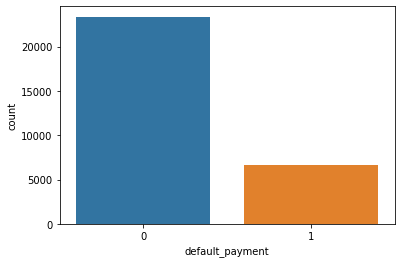

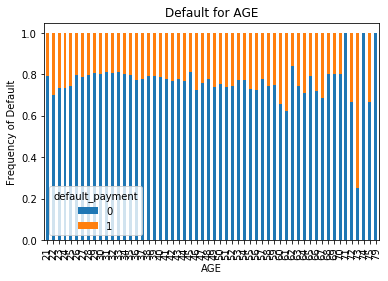

In [0]:
#Analyse relationships for each other.

#The response variable is binary
seabornInstance.countplot(x=dataset.loc[:,'default_payment'], data=dataset)
plt.show()

#Exploring data to define predictors
table=pd.crosstab(dataset.AGE,dataset.default_payment)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Default for AGE')
plt.xlabel('AGE')
plt.ylabel('Frequency of Default')

pd.crosstab(dataset.EDUCATION,dataset.default_payment).plot(kind='bar',stacked=True)
plt.title('Default for Education')
plt.xlabel('Education Level')
plt.ylabel('Frequency of Default')

#status (1 = married; 2 = single; 3 = others)
pd.crosstab(dataset.MARRIAGE,dataset.default_payment).plot(kind='bar')
plt.title('Default for Marriage')
plt.xlabel('Marriage Status')
plt.ylabel('Frequency of Default')

#Warning: What do you think about the relationship between a predictor variable
#and the response variable? 
seabornInstance.set(style="ticks", color_codes=True)
g = seabornInstance.pairplot(dataset.loc[:, 'BILL_AMT1':'default_payment'])

# plot the heatmap
corr = dataset.loc[:, 'SEX':'default_payment'].corr()
seabornInstance.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        vmin=-1, vmax=1, center=0,
        cmap=seabornInstance.diverging_palette(20, 220, n=200),
        square=True)	


Define predictors and response variables

In [0]:
#Define the predictor and the output variable.
#This task depends on several assumptions based on experience, for instance, 
X = dataset.loc[:, 'PAY_0':'PAY_6'] 
y = dataset['default_payment'].values.reshape(-1,1) # Unknown rows, one column


Define training and test datasets

In [0]:
#Define the sizes of training set and test dataset, applying 80-20 criterion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



Training Process

In [10]:
#Train the model
#‘lbfgs’ is an optimizer in the family of quasi-Newton methods ().
#‘sgd’ refers to stochastic gradient descent. (More efficient)
#classifier = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
classifier = MLPClassifier(solver='sgd', hidden_layer_sizes=(5, 2), random_state=1)           
classifier.fit(X_train, y_train) #training the algorithm
#To retrieve the intercept:
print(classifier.coefs_)




/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[array([[-0.10240727,  0.82157662, -0.34887587, -0.44346659, -0.76618864],
       [-0.61951649, -0.29165006, -0.28316739, -0.24381606,  0.17204763],
       [-0.17169242,  0.09628242, -0.10164354,  0.23211518, -0.6315762 ],
       [ 0.18067673, -0.05315354, -0.31117438, -0.64275906, -0.27028336],
       [ 0.4299309 ,  0.4054751 ,  0.19184121, -0.00822351,  0.45426462],
       [ 0.53360247, -0.300352  , -0.23110648, -0.67691596,  0.36623201]]), array([[-0.39052169,  0.09039988],
       [ 0.28773388, -0.91782694],
       [ 0.4061732 ,  1.19998591],
       [ 0.37449935, -0.63270317],
       [ 0.54823078, -0.54037074]]), array([[ 0.01366738],
       [-1.07146792]])]


Testing Process

In [11]:

#Make prediction based on the model using the test data
from sklearn.metrics import confusion_matrix
from sklearn import metrics
y_pred= classifier.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


[[4463  240]
 [ 802  495]]
Accuracy: 0.8263333333333334
